In [1]:
#importing classes and functions needed
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras import optimizers
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#fix random seed for reproducability of results
seed=4
numpy.random.seed(seed)

In [3]:
#Load or download mnist database
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [4]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0],num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0],num_pixels).astype('float32')

In [5]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [6]:
# one hot encode outputs
Y_train  = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_classes = Y_test.shape[1]

In [7]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels,input_dim=num_pixels,kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_pixels, kernel_initializer='normal',activation='relu'))
    model.add(Dense(num_pixels, kernel_initializer='normal',activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal',activation='sigmoid'))
    # compile model
    #sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False  )
    #model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
    model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
    return model

In [8]:
#RESULTS
# sgd-momentum-crossentropy ~3.53
# sgd-momentum-mse  ~8.58
# adagrad-crossentropy ~1.54 with three hidden layers being optimum.
# adagrad-mse ~2.56

In [9]:
#build the model
model = baseline_model()
#fit the model
history = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 24s - loss: 0.3099 - acc: 0.9084 - val_loss: 0.1006 - val_acc: 0.9693
Epoch 2/10
 - 28s - loss: 0.0607 - acc: 0.9811 - val_loss: 0.0762 - val_acc: 0.9759
Epoch 3/10
 - 24s - loss: 0.0316 - acc: 0.9907 - val_loss: 0.0600 - val_acc: 0.9826
Epoch 4/10
 - 24s - loss: 0.0160 - acc: 0.9958 - val_loss: 0.0627 - val_acc: 0.9818
Epoch 5/10
 - 24s - loss: 0.0076 - acc: 0.9984 - val_loss: 0.0588 - val_acc: 0.9851
Epoch 6/10
 - 24s - loss: 0.0039 - acc: 0.9993 - val_loss: 0.0622 - val_acc: 0.9831
Epoch 7/10
 - 29s - loss: 0.0019 - acc: 0.9998 - val_loss: 0.0641 - val_acc: 0.9831
Epoch 8/10
 - 25s - loss: 0.0012 - acc: 0.9999 - val_loss: 0.0649 - val_acc: 0.9837
Epoch 9/10
 - 25s - loss: 6.6938e-04 - acc: 1.0000 - val_loss: 0.0674 - val_acc: 0.9837
Epoch 10/10
 - 26s - loss: 4.6587e-04 - acc: 1.0000 - val_loss: 0.0665 - val_acc: 0.9846


In [10]:
#error rate of the model
scores = model.evaluate(X_test,Y_test, verbose=0)
print("Baseline error: %.2f%%" % (100-scores[1]*100))

Baseline error: 1.54%


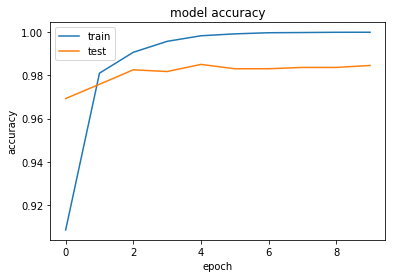

In [11]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

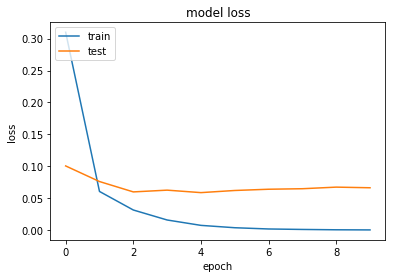

In [12]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()